<a href="https://colab.research.google.com/github/Nidzam81/ML-AI/blob/main/AI_Cipta_Malay_Song_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [21]:

tokenizer = Tokenizer()
data = open('Lirik lagu.txt').read()

corpus = data.lower().split("\n")
print(corpus)
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


['ï»¿malam semakin kelam', 'di tambah kesepian', 'sukar untukku untuk menjemput mimpi', 'ke mana lenaku pergi', 'ku bicara sendiri', 'agar terhapus sepi', 'sejak berkurun aku menjemput rindu', 'haruskah ku menunggu', 'andai langkahmu kini terhenti', 'berpalinglah padaku di sini', 'jernihkanlah kekeruhan dulu', 'ku perlu kasihmu', 'ibarat laut yang tidak berombak', 'pasti pantai akan kesepian', 'begitulah hidupku kini', 'semenjak kau pergi', 'terusik hatiku mengenang', 'kenangan di taman cinta', 'hingga kini masih ku terasa hangatnya sentuhanmu', 'ku jadikan sejarah untuk kita kenangkan', 'di tika sepi', 'di tika rindu ', 'setiap sesuatu yang dimiliki', 'semuanya tak kekal lama di sini', 'setiap kali ku cuba menyayangi', 'terpaksa ku fikir berulang kali', 'tak rela aku bakal ditinggalkan', 'tersiksa kekecewaan', 'ku mengharungi', 'setiap liku kehidupan', 'dengan rasa waspada', 'yang ku bimbangi', 'diriku tergelinciran', 'dan menyesal seusia', 'andai kau fahami', 'sabar menanti', 'kan ku

In [9]:
import json
with open('word_index.json','w') as fp:
    json.dump(tokenizer.word_index,fp)

In [22]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)
print(input_sequences)
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print(max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

[[358, 359], [358, 359, 360], [3, 361], [3, 361, 190], [191, 192], [191, 192, 20], [191, 192, 20, 193], [191, 192, 20, 193, 48], [33, 49], [33, 49, 362], [33, 49, 362, 39], [1, 121], [1, 121, 50], [51, 363], [51, 363, 122], [123, 364], [123, 364, 2], [123, 364, 2, 193], [123, 364, 2, 193, 15], [365, 1], [365, 1, 124], [82, 366], [82, 366, 40], [82, 366, 40, 194], [367, 368], [367, 368, 3], [367, 368, 3, 195], [369, 370], [369, 370, 83], [1, 125], [1, 125, 371], [372, 373], [372, 373, 5], [372, 373, 5, 26], [372, 373, 5, 26, 374], [126, 196], [126, 196, 84], [126, 196, 84, 190], [375, 65], [375, 65, 40], [376, 4], [376, 4, 39], [377, 52], [377, 52, 378], [85, 3], [85, 3, 379], [85, 3, 379, 9], [86, 40], [86, 40, 87], [86, 40, 87, 1], [86, 40, 87, 1, 380], [86, 40, 87, 1, 380, 381], [86, 40, 87, 1, 380, 381, 382], [1, 197], [1, 197, 198], [1, 197, 198, 20], [1, 197, 198, 20, 6], [1, 197, 198, 20, 6, 199], [3, 200], [3, 200, 122], [3, 200], [3, 200, 15], [29, 127], [29, 127, 5], [29, 127,

In [6]:
print(tokenizer.word_index)

{'ku': 1, 'aku': 2, 'di': 3, 'kau': 4, 'yang': 5, 'kita': 6, 'ini': 7, 'tak': 8, 'cinta': 9, 'dan': 10, 'dalam': 11, 'apa': 12, 'hati': 13, 'tanya': 14, 'rindu': 15, 'rasa': 16, 'kata': 17, 'khabar': 18, 'dengan': 19, 'untuk': 20, 'semua': 21, 'ada': 22, 'tiada': 23, 'oh': 24, 'tapi': 25, 'tidak': 26, 'bila': 27, 'tahu': 28, 'setiap': 29, 'kan': 30, 'sayang': 31, 'kasih': 32, 'ke': 33, 'namun': 34, 'banyak': 35, 'hanya': 36, 'bersama': 37, 'hari': 38, 'pergi': 39, 'kini': 40, 'kekasih': 41, 'cintaku': 42, 'diri': 43, 'engkau': 44, 'itu': 45, 'mungkin': 46, 'harus': 47, 'mimpi': 48, 'mana': 49, 'sendiri': 50, 'agar': 51, 'hatiku': 52, 'cuba': 53, 'pabila': 54, 'bertemu': 55, 'menangis': 56, 'pada': 57, 'walau': 58, 'pilu': 59, 'kalau': 60, 'kala': 61, 'nak': 62, 'bahagia': 63, 'selamanya': 64, 'hidupku': 65, 'kali': 66, 'moga': 67, 'pernah': 68, 'semalam': 69, 'mata': 70, 'dari': 71, 'lagi': 72, 'seorang': 73, 'hatimu': 74, 'lebih': 75, 'dua': 76, 'jadi': 77, 'lagu': 78, 'juga': 79, 'sa

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
# model.add(Bidirectional(LSTM(150)))
model.add(Bidirectional(LSTM(150,return_sequences = True)))
# model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=1000, verbose=1)
#print model.summary()
print(model)
model.save("test.h5")

Epoch 1/1000
56/56 [==============================] - 11s 59ms/step - loss: 6.6633 - accuracy: 0.02192s - l
Epoch 2/1000
56/56 [==============================] - 3s 59ms/step - loss: 5.9133 - accuracy: 0.0518
Epoch 3/1000
56/56 [==============================] - 3s 58ms/step - loss: 5.1741 - accuracy: 0.0914
Epoch 4/1000
56/56 [==============================] - 3s 57ms/step - loss: 4.2613 - accuracy: 0.1995
Epoch 5/1000
56/56 [==============================] - 3s 61ms/step - loss: 3.1427 - accuracy: 0.3279 0s - loss: 3.1397 - accuracy: 0.32
Epoch 6/1000
56/56 [==============================] - 3s 58ms/step - loss: 2.3898 - accuracy: 0.4477
Epoch 7/1000
56/56 [==============================] - 3s 58ms/step - loss: 1.6997 - accuracy: 0.5695 0s - loss: 1.6945 - accuracy: 0.
Epoch 8/1000
56/56 [==============================] - 3s 56ms/step - loss: 1.2129 - accuracy: 0.6789
Epoch 9/1000
56/56 [==============================] - 3s 56ms/step - loss: 0.9674 - accuracy: 0.7482
Epoch 10/1000
56

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

In [ ]:
model.save("test.h5")

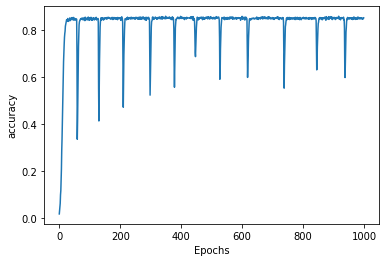

In [18]:
plot_graphs(history, 'accuracy')


In [20]:
seed_text = "kehilangan mu"
next_words = 10
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

[154]


c:\users\user-pc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[154, 4]
[154, 4, 5]
[154, 4, 5, 28]
[154, 4, 5, 28, 789]
[154, 4, 5, 28, 789, 5]
[154, 4, 5, 28, 789, 5, 790]
[154, 4, 5, 28, 789, 5, 790, 2]
[154, 4, 5, 28, 789, 5, 790, 2, 218]
[154, 4, 5, 28, 789, 5, 790, 2, 218, 245]
kehilangan mu kau yang tahu kodeksku yang kompleks aku hasratku erti berganti
